In [2]:
# import zeep
# import numpy as np
# import math
# import time
# import tensorflow as tf

# import matplotlib.pyplot as plt

# from tensorflow import estimator
# from tensorflow import keras
# from tensorflow.keras.utils import *
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# from sklearn.model_selection import train_test_split

# from tensorflow.compat.v1.keras import backend as K

# import tensorflow_probability as tfp

In [1]:
import zeep
import numpy as np
import math
import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.compat.v1 import estimator

from tensorflow import keras
from tensorflow.compat.v1.keras.utils import *
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.compat.v1.keras import backend as K
import tensorflow_probability as tfp

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
cubes = [1,2,3,4,5]
grad_data = np.array([]).reshape(0,9)
SGS_data = np.array([]).reshape(0,6)
for i in cubes:
    grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad.npy')])"
    SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
    exec(grad_line)
    exec(SGS_line)

In [4]:
# grad_data_rot_1 = grad_data[:, [4, 3, 5, 1, 0, 2, 7, 6, 8]]
# SGS_data_rot_1 = SGS_data[:, [1, 0, 2, 3, 5, 4]]

# grad_data_rot_2 = grad_data[:, [0, 2, 1, 6, 8, 7, 3, 5, 4]]
# SGS_data_rot_2 = SGS_data[:, [0, 2, 1, 4, 3, 5]]

# grad_data_rot_3 = grad_data[:, [4, 5, 3, 7, 8, 6, 1, 2, 0]]
# SGS_data_rot_3 = SGS_data[:, [1, 2, 0, 5, 4, 3]]

# grad_data_rot_4 = grad_data[:, [8, 6, 7, 2, 0, 1, 5, 3, 4]]
# SGS_data_rot_4 = SGS_data[:, [2, 0, 1, 4, 5, 3]]

# grad_data_rot_5 = grad_data[:, [8, 7, 6, 5, 4, 3, 2, 1, 0]]
# SGS_data_rot_5 = SGS_data[:, [2, 1, 0, 5, 4, 3]]

# print(np.shape(grad_data))
# grad_data = np.concatenate((grad_data, grad_data_rot_1, grad_data_rot_2, grad_data_rot_3, grad_data_rot_4, grad_data_rot_5))
# SGS_data = np.concatenate((SGS_data, SGS_data_rot_1, SGS_data_rot_2, SGS_data_rot_3, SGS_data_rot_4, SGS_data_rot_5))
# print(np.shape(grad_data))

In [5]:
# cubes = [1,3,4]
# grad_data = np.array([]).reshape(0,12)
# SGS_data = np.array([]).reshape(0,6)
# for i in cubes:
#     grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad_p.npy')])"
#     SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
#     exec(grad_line)
#     exec(SGS_line)

In [22]:
print('min and max input before scaling:')
print(np.amin(grad_data,0))
print(np.amax(grad_data,0))

print('min and max output before scaling:')
print(np.amin(SGS_data,0))
print(np.amax(SGS_data,0))

# x_grad_offset = -25
# x_grad_scale = 50

# y_SGS_offset = -1.1
# y_SGS_scale = 2.2

# x_grad_offset = 0
# x_grad_scale = [15,20,25,22,18,20,22,23,18]

# y_SGS_offset = [-0.5,-0.5,-0.5,0,0,0]
# y_SGS_scale = [0.5,0.55,0.5,0.4,0.4,0.4]

x_grad_offset = 0
x_grad_scale = 1

y_SGS_offset = 0
y_SGS_scale = 1

x = grad_data - x_grad_offset
x = x / x_grad_scale

y = SGS_data - y_SGS_offset
y = y / y_SGS_scale
print("\ny before removing diagonal:")
print(y)
y = y[:,3:6]
print("\ny after removing diagonal:")
print(y)
# y = SGSsym

# x = (x-x.mean(axis = 0))/x.std(axis = 0)
# y = (y-y.mean(axis = 0))/y.std(axis = 0)

print('Input Data Size:')
print(np.shape(x))
print('Output Data Size:')
print(np.shape(y))

print('min and max input after scaling:')
print(np.amin(x,0))
print(np.amax(x,0))

print('min and max output after scaling:')
print(np.amin(y,0))
print(np.amax(y,0))

min and max input before scaling:
[-18.74556   -23.4333229 -30.9432316 -20.4714222 -16.5075932 -21.0008183
 -28.2827263 -24.87106   -17.15962  ]
[13.8737316 22.8848572 25.5311375 21.9776726 15.2345762 26.6753883
 23.98605   25.6773453 14.6427183]
min and max output before scaling:
[ 8.31633800e-05  5.61475754e-05  7.91251659e-05 -5.10315300e-01
 -3.90936852e-01 -4.28805172e-01]
[1.02092254 1.07496333 1.003601   0.41171658 0.6519352  0.36166   ]

y before removing diagonal:
[[ 2.68875062e-02  3.68618369e-02  5.04427400e-02  1.41732100e-02
  -1.57459155e-02 -1.00441575e-02]
 [ 1.20823637e-01  7.01293051e-02  1.37525100e-01  3.57914381e-02
  -9.91259100e-02 -5.67428321e-02]
 [ 3.48325074e-01  1.30680248e-01  1.10449284e-01  1.34855800e-01
  -1.00204870e-01 -4.57782447e-02]
 ...
 [ 6.39802200e-03  6.36816025e-03  1.19444914e-02  2.49743462e-04
   4.01956600e-03  1.68693066e-03]
 [ 4.51830029e-03  6.93488100e-03  2.48126686e-03 -3.55148315e-03
   5.64202666e-04 -1.10495090e-03]
 [ 2.6858450

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
batch_size = 512

In [25]:
def correlation_coefficient(y_true, y_pred):
  return tfp.stats.correlation(y_true, y_pred)

def correlation(y, y_hat):
  corr = tfp.stats.correlation(y,y_hat)
  return tf.math.reduce_mean(corr)

def correlation_coefficient_alvaro(y_true,y_pred):
    DNS = y_true
    ANN = y_pred

    N = batch_size

    num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

    den_term_DNS = N * tf.reduce_sum(tf.square(DNS),0) - tf.square(tf.reduce_sum(DNS,0))
    den_term_ANN = N * tf.reduce_sum(tf.square(ANN),0) - tf.square(tf.reduce_sum(ANN,0))
    den = tf.sqrt(tf.multiply(den_term_DNS,den_term_ANN))

    r = tf.divide(num,den)
    return r

# def cc_a0(y_true,y_pred):
#     DNS = y_true
#     ANN = y_pred

#     N = batch_size

#     num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

#     den_sq_np = tf.make_ndarray(den_sq_proto)
#     den_sq0 = float(den_sq_np[0])
#     den0 = 

#     r = tf.divide(num,den)
#     return 512

def correlation_coefficient_theo(y_true, y_pred):
    DNS = y_true
    DNS_mean = tf.reduce_mean(DNS,0)
    num_term_DNS = DNS - DNS_mean
    
    ANN = y_pred
    ANN_mean = tf.reduce_mean(ANN,0)
    num_term_ANN = ANN - ANN_mean
    
    num = tf.reduce_mean(tf.multiply(num_term_DNS,num_term_ANN),0)

    den_term_DNS = tf.sqrt(tf.reduce_mean(tf.square(num_term_DNS),0))
    den_term_ANN = tf.sqrt(tf.reduce_mean(tf.square(num_term_ANN),0))
    
    den = tf.multiply(den_term_DNS,den_term_ANN)

    r = tf.divide(num,den)
    return r

def correlation_coefficient_chooser(y_true, y_pred):
    r = correlation_coefficient_alvaro(y_true, y_pred)
    return r

def cc_0(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[0]

def cc_1(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[1]

def cc_2(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[2]

# def cc_3(y_true, y_pred):
#     r = correlation_coefficient_chooser(y_true, y_pred)
#     return r[3]

# def cc_4(y_true, y_pred):
#     r = correlation_coefficient_chooser(y_true, y_pred)
#     return r[4]

# def cc_5(y_true, y_pred):
#     r = correlation_coefficient_chooser(y_true, y_pred)
#     return r[5]

In [29]:
#Defining neural network architecture EDIT THIS CODE

input_vars = 9
output_vars = 3
keras.backend.clear_session()
hidden_layer_nodes = np.array([i * 12 for i in [2,1,2]]) #each item in the array is a hidden layer, the value being the number of nodes within the layer
activation_function = ['relu'] #each item in the array is an activation function
layers = len(hidden_layer_nodes)


model = Sequential()
#Iterating through layer_nodes and activation_function arrays to define neural net. architecure
for i in range(layers):
    nodes = hidden_layer_nodes[i]
    try:
        func = activation_function[i]
    except:
        func = activation_function[0]
    model.add(Dense(units=nodes, activation = func, input_dim = input_vars))#, kernel_initializer = tf.keras.initializers.GlorotNormal()))
model.add(Dense(units=output_vars))

#compile model, trying to minimise mean squared error and using the Adam algorithm to fit this
opt = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss='mse', optimizer=opt, metrics=[cc_0,cc_1,cc_2])
# model.compile(loss='mse', optimizer=opt, metrics=[correlation_coefficient_alvaro])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 75        
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________


In [30]:
start_time = time.time()
epoch_number = 1000
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch_number, batch_size=512, verbose = 1)
print("--- %s seconds ---" % (time.time() - start_time))

Train on 500000 samples, validate on 125000 samples
Epoch 1/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 0.0031 - cc_0: 0.0254 - cc_1: 0.0522 - cc_2: 0.0570 - val_loss: 2.0347e-04 - val_cc_0: 0.0550 - val_cc_1: 0.1112 - val_cc_2: 0.0956
Epoch 2/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.9733e-04 - cc_0: 0.0714 - cc_1: 0.1264 - cc_2: 0.1188 - val_loss: 1.9473e-04 - val_cc_0: 0.1101 - val_cc_1: 0.1513 - val_cc_2: 0.1322
Epoch 3/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.9098e-04 - cc_0: 0.1441 - cc_1: 0.1693 - cc_2: 0.1796 - val_loss: 1.8915e-04 - val_cc_0: 0.1953 - val_cc_1: 0.1864 - val_cc_2: 0.2213
Epoch 4/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.8674e-04 - cc_0: 0.2139 - cc_1: 0.2165 - cc_2: 0.2410 - val_loss: 1.8543e-04 - val_cc_0: 0.2269 - val_cc_1: 0.2253 - val_cc_2: 0.2774
Epoch 5/1000
500000/500000 [==============================] - 1s 3us/sam

Epoch 38/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1679e-04 - cc_0: 0.6346 - cc_1: 0.6270 - cc_2: 0.6323 - val_loss: 1.1661e-04 - val_cc_0: 0.6348 - val_cc_1: 0.6233 - val_cc_2: 0.6371
Epoch 39/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1668e-04 - cc_0: 0.6335 - cc_1: 0.6271 - cc_2: 0.6331 - val_loss: 1.1601e-04 - val_cc_0: 0.6365 - val_cc_1: 0.6250 - val_cc_2: 0.6336
Epoch 40/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1647e-04 - cc_0: 0.6361 - cc_1: 0.6274 - cc_2: 0.6324 - val_loss: 1.1592e-04 - val_cc_0: 0.6350 - val_cc_1: 0.6291 - val_cc_2: 0.6347
Epoch 41/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1669e-04 - cc_0: 0.6330 - cc_1: 0.6273 - cc_2: 0.6336 - val_loss: 1.1801e-04 - val_cc_0: 0.6303 - val_cc_1: 0.6158 - val_cc_2: 0.6336
Epoch 42/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1659e-04 - cc_0: 0.6346 - cc_

500000/500000 [==============================] - ETA: 0s - loss: 1.1631e-04 - cc_0: 0.6362 - cc_1: 0.6267 - cc_2: 0.63 - 1s 3us/sample - loss: 1.1639e-04 - cc_0: 0.6363 - cc_1: 0.6266 - cc_2: 0.6339 - val_loss: 1.1633e-04 - val_cc_0: 0.6384 - val_cc_1: 0.6236 - val_cc_2: 0.6321
Epoch 76/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1651e-04 - cc_0: 0.6336 - cc_1: 0.6275 - cc_2: 0.6341 - val_loss: 1.1520e-04 - val_cc_0: 0.6422 - val_cc_1: 0.6254 - val_cc_2: 0.6380
Epoch 77/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1645e-04 - cc_0: 0.6350 - cc_1: 0.6279 - cc_2: 0.6332 - val_loss: 1.1487e-04 - val_cc_0: 0.6412 - val_cc_1: 0.6277 - val_cc_2: 0.6375
Epoch 78/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1667e-04 - cc_0: 0.6331 - cc_1: 0.6279 - cc_2: 0.6331 - val_loss: 1.1712e-04 - val_cc_0: 0.6261 - val_cc_1: 0.6219 - val_cc_2: 0.6322
Epoch 79/1000
500000/500000 [=============================

Epoch 112/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1635e-04 - cc_0: 0.6359 - cc_1: 0.6272 - cc_2: 0.6338 - val_loss: 1.1591e-04 - val_cc_0: 0.6432 - val_cc_1: 0.6269 - val_cc_2: 0.6309
Epoch 113/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1625e-04 - cc_0: 0.6359 - cc_1: 0.6283 - cc_2: 0.6333 - val_loss: 1.1482e-04 - val_cc_0: 0.6403 - val_cc_1: 0.6270 - val_cc_2: 0.6393
Epoch 114/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1655e-04 - cc_0: 0.6350 - cc_1: 0.6268 - cc_2: 0.6327 - val_loss: 1.1761e-04 - val_cc_0: 0.6370 - val_cc_1: 0.6237 - val_cc_2: 0.6335
Epoch 115/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1636e-04 - cc_0: 0.6359 - cc_1: 0.6279 - cc_2: 0.6333 - val_loss: 1.1737e-04 - val_cc_0: 0.6369 - val_cc_1: 0.6217 - val_cc_2: 0.6310
Epoch 116/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1619e-04 - cc_0: 0.6360 

Epoch 149/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1632e-04 - cc_0: 0.6344 - cc_1: 0.6278 - cc_2: 0.6339 - val_loss: 1.1930e-04 - val_cc_0: 0.6240 - val_cc_1: 0.6140 - val_cc_2: 0.6274
Epoch 150/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1634e-04 - cc_0: 0.6357 - cc_1: 0.6289 - cc_2: 0.6336 - val_loss: 1.1709e-04 - val_cc_0: 0.6375 - val_cc_1: 0.6204 - val_cc_2: 0.6343
Epoch 151/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1628e-04 - cc_0: 0.6366 - cc_1: 0.6272 - cc_2: 0.6326 - val_loss: 1.1572e-04 - val_cc_0: 0.6415 - val_cc_1: 0.6265 - val_cc_2: 0.6311
Epoch 152/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1649e-04 - cc_0: 0.6350 - cc_1: 0.6285 - cc_2: 0.6335 - val_loss: 1.1703e-04 - val_cc_0: 0.6394 - val_cc_1: 0.6228 - val_cc_2: 0.6305
Epoch 153/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1631e-04 - cc_0: 0.6363 

Epoch 186/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1629e-04 - cc_0: 0.6361 - cc_1: 0.6287 - cc_2: 0.6353 - val_loss: 1.1544e-04 - val_cc_0: 0.6415 - val_cc_1: 0.6293 - val_cc_2: 0.6339
Epoch 187/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1606e-04 - cc_0: 0.6360 - cc_1: 0.6291 - cc_2: 0.6345 - val_loss: 1.1558e-04 - val_cc_0: 0.6376 - val_cc_1: 0.6230 - val_cc_2: 0.6339
Epoch 188/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1587e-04 - cc_0: 0.6364 - cc_1: 0.6295 - cc_2: 0.6341 - val_loss: 1.1483e-04 - val_cc_0: 0.6413 - val_cc_1: 0.6282 - val_cc_2: 0.6369
Epoch 189/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1635e-04 - cc_0: 0.6369 - cc_1: 0.6276 - cc_2: 0.6335 - val_loss: 1.1576e-04 - val_cc_0: 0.6422 - val_cc_1: 0.6238 - val_cc_2: 0.6353
Epoch 190/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1608e-04 - cc_0: 0.6363 

Epoch 223/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1598e-04 - cc_0: 0.6368 - cc_1: 0.6288 - cc_2: 0.6346 - val_loss: 1.1874e-04 - val_cc_0: 0.6343 - val_cc_1: 0.6168 - val_cc_2: 0.6292
Epoch 224/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1634e-04 - cc_0: 0.6349 - cc_1: 0.6278 - cc_2: 0.6341 - val_loss: 1.1483e-04 - val_cc_0: 0.6411 - val_cc_1: 0.6255 - val_cc_2: 0.6372
Epoch 225/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1589e-04 - cc_0: 0.6356 - cc_1: 0.6287 - cc_2: 0.6355 - val_loss: 1.1806e-04 - val_cc_0: 0.6416 - val_cc_1: 0.6246 - val_cc_2: 0.6309
Epoch 226/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1581e-04 - cc_0: 0.6368 - cc_1: 0.6283 - cc_2: 0.6355 - val_loss: 1.1586e-04 - val_cc_0: 0.6435 - val_cc_1: 0.6168 - val_cc_2: 0.6389
Epoch 227/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1587e-04 - cc_0: 0.6352 

Epoch 260/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1650e-04 - cc_0: 0.6343 - cc_1: 0.6293 - cc_2: 0.6338 - val_loss: 1.2351e-04 - val_cc_0: 0.6360 - val_cc_1: 0.5566 - val_cc_2: 0.6218
Epoch 261/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1606e-04 - cc_0: 0.6380 - cc_1: 0.6255 - cc_2: 0.6350 - val_loss: 1.1677e-04 - val_cc_0: 0.6428 - val_cc_1: 0.6232 - val_cc_2: 0.6335
Epoch 262/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1618e-04 - cc_0: 0.6347 - cc_1: 0.6289 - cc_2: 0.6339 - val_loss: 1.1596e-04 - val_cc_0: 0.6393 - val_cc_1: 0.6254 - val_cc_2: 0.6350
Epoch 263/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1598e-04 - cc_0: 0.6349 - cc_1: 0.6302 - cc_2: 0.6344 - val_loss: 1.1527e-04 - val_cc_0: 0.6443 - val_cc_1: 0.6269 - val_cc_2: 0.6321
Epoch 264/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1647e-04 - cc_0: 0.6363 

Epoch 297/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1607e-04 - cc_0: 0.6358 - cc_1: 0.6280 - cc_2: 0.6337 - val_loss: 1.1519e-04 - val_cc_0: 0.6441 - val_cc_1: 0.6220 - val_cc_2: 0.6364
Epoch 298/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1611e-04 - cc_0: 0.6350 - cc_1: 0.6289 - cc_2: 0.6330 - val_loss: 1.1582e-04 - val_cc_0: 0.6445 - val_cc_1: 0.6190 - val_cc_2: 0.6366
Epoch 299/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1682e-04 - cc_0: 0.6342 - cc_1: 0.6244 - cc_2: 0.6342 - val_loss: 1.1533e-04 - val_cc_0: 0.6404 - val_cc_1: 0.6245 - val_cc_2: 0.6349
Epoch 300/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1615e-04 - cc_0: 0.6366 - cc_1: 0.6274 - cc_2: 0.6340 - val_loss: 1.1498e-04 - val_cc_0: 0.6413 - val_cc_1: 0.6289 - val_cc_2: 0.6373
Epoch 301/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1568e-04 - cc_0: 0.6362 

500000/500000 [==============================] - 1s 3us/sample - loss: 1.1593e-04 - cc_0: 0.6370 - cc_1: 0.6275 - cc_2: 0.6342 - val_loss: 1.1625e-04 - val_cc_0: 0.6360 - val_cc_1: 0.6217 - val_cc_2: 0.6364
Epoch 334/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1588e-04 - cc_0: 0.6360 - cc_1: 0.6299 - cc_2: 0.6341 - val_loss: 1.1658e-04 - val_cc_0: 0.6306 - val_cc_1: 0.6241 - val_cc_2: 0.6335
Epoch 335/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1591e-04 - cc_0: 0.6365 - cc_1: 0.6278 - cc_2: 0.6336 - val_loss: 1.1612e-04 - val_cc_0: 0.6389 - val_cc_1: 0.6293 - val_cc_2: 0.6318
Epoch 336/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1578e-04 - cc_0: 0.6372 - cc_1: 0.6297 - cc_2: 0.6345 - val_loss: 1.1625e-04 - val_cc_0: 0.6365 - val_cc_1: 0.6239 - val_cc_2: 0.6295
Epoch 337/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1630e-04 - cc_0: 0.6352 - cc_1: 0.6284 

Epoch 370/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1540e-04 - cc_0: 0.6383 - cc_1: 0.6295 - cc_2: 0.6363 - val_loss: 1.1729e-04 - val_cc_0: 0.6372 - val_cc_1: 0.6147 - val_cc_2: 0.6351
Epoch 371/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1582e-04 - cc_0: 0.6358 - cc_1: 0.6298 - cc_2: 0.6352 - val_loss: 1.1644e-04 - val_cc_0: 0.6441 - val_cc_1: 0.6242 - val_cc_2: 0.6370
Epoch 372/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1625e-04 - cc_0: 0.6355 - cc_1: 0.6273 - cc_2: 0.6350 - val_loss: 1.1585e-04 - val_cc_0: 0.6440 - val_cc_1: 0.6229 - val_cc_2: 0.6280
Epoch 373/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1577e-04 - cc_0: 0.6369 - cc_1: 0.6290 - cc_2: 0.6351 - val_loss: 1.1737e-04 - val_cc_0: 0.6369 - val_cc_1: 0.6262 - val_cc_2: 0.6371
Epoch 374/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1565e-04 - cc_0: 0.6367 

Epoch 407/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1591e-04 - cc_0: 0.6371 - cc_1: 0.6294 - cc_2: 0.6335 - val_loss: 1.1599e-04 - val_cc_0: 0.6384 - val_cc_1: 0.6216 - val_cc_2: 0.6355
Epoch 408/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1548e-04 - cc_0: 0.6376 - cc_1: 0.6302 - cc_2: 0.6355 - val_loss: 1.1679e-04 - val_cc_0: 0.6349 - val_cc_1: 0.6203 - val_cc_2: 0.6386
Epoch 409/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1603e-04 - cc_0: 0.6353 - cc_1: 0.6272 - cc_2: 0.6351 - val_loss: 1.1529e-04 - val_cc_0: 0.6390 - val_cc_1: 0.6263 - val_cc_2: 0.6388
Epoch 410/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1576e-04 - cc_0: 0.6361 - cc_1: 0.6300 - cc_2: 0.6365 - val_loss: 1.1423e-04 - val_cc_0: 0.6453 - val_cc_1: 0.6257 - val_cc_2: 0.6372
Epoch 411/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1573e-04 - cc_0: 0.6355 

Epoch 444/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1552e-04 - cc_0: 0.6383 - cc_1: 0.6303 - cc_2: 0.6347 - val_loss: 1.1595e-04 - val_cc_0: 0.6396 - val_cc_1: 0.6227 - val_cc_2: 0.6327
Epoch 445/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1615e-04 - cc_0: 0.6366 - cc_1: 0.6282 - cc_2: 0.6345 - val_loss: 1.1759e-04 - val_cc_0: 0.6427 - val_cc_1: 0.6197 - val_cc_2: 0.6349
Epoch 446/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1566e-04 - cc_0: 0.6367 - cc_1: 0.6288 - cc_2: 0.6350 - val_loss: 1.1580e-04 - val_cc_0: 0.6413 - val_cc_1: 0.6235 - val_cc_2: 0.6349
Epoch 447/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1615e-04 - cc_0: 0.6365 - cc_1: 0.6291 - cc_2: 0.6342 - val_loss: 1.1733e-04 - val_cc_0: 0.6380 - val_cc_1: 0.6163 - val_cc_2: 0.6309
Epoch 448/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1572e-04 - cc_0: 0.6372 

Epoch 481/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1593e-04 - cc_0: 0.6374 - cc_1: 0.6283 - cc_2: 0.6343 - val_loss: 1.1485e-04 - val_cc_0: 0.6461 - val_cc_1: 0.6249 - val_cc_2: 0.6333
Epoch 482/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1587e-04 - cc_0: 0.6358 - cc_1: 0.6287 - cc_2: 0.6343 - val_loss: 1.1507e-04 - val_cc_0: 0.6405 - val_cc_1: 0.6283 - val_cc_2: 0.6370
Epoch 483/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1599e-04 - cc_0: 0.6361 - cc_1: 0.6284 - cc_2: 0.6351 - val_loss: 1.1777e-04 - val_cc_0: 0.6375 - val_cc_1: 0.6228 - val_cc_2: 0.6254
Epoch 484/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1551e-04 - cc_0: 0.6360 - cc_1: 0.6296 - cc_2: 0.6357 - val_loss: 1.1605e-04 - val_cc_0: 0.6367 - val_cc_1: 0.6269 - val_cc_2: 0.6305
Epoch 485/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1558e-04 - cc_0: 0.6365 

500000/500000 [==============================] - 1s 3us/sample - loss: 1.1562e-04 - cc_0: 0.6363 - cc_1: 0.6282 - cc_2: 0.6354 - val_loss: 1.1619e-04 - val_cc_0: 0.6427 - val_cc_1: 0.6255 - val_cc_2: 0.6372
Epoch 518/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1558e-04 - cc_0: 0.6377 - cc_1: 0.6281 - cc_2: 0.6368 - val_loss: 1.1563e-04 - val_cc_0: 0.6351 - val_cc_1: 0.6237 - val_cc_2: 0.6372
Epoch 519/1000
500000/500000 [==============================] - ETA: 0s - loss: 1.1593e-04 - cc_0: 0.6364 - cc_1: 0.6277 - cc_2: 0.63 - 1s 3us/sample - loss: 1.1602e-04 - cc_0: 0.6364 - cc_1: 0.6283 - cc_2: 0.6360 - val_loss: 1.1743e-04 - val_cc_0: 0.6414 - val_cc_1: 0.6181 - val_cc_2: 0.6368
Epoch 520/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1652e-04 - cc_0: 0.6346 - cc_1: 0.6275 - cc_2: 0.6350 - val_loss: 1.1753e-04 - val_cc_0: 0.6402 - val_cc_1: 0.6251 - val_cc_2: 0.6295
Epoch 521/1000
500000/500000 [=========================

Epoch 554/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1555e-04 - cc_0: 0.6368 - cc_1: 0.6300 - cc_2: 0.6351 - val_loss: 1.1721e-04 - val_cc_0: 0.6320 - val_cc_1: 0.6188 - val_cc_2: 0.6344
Epoch 555/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1548e-04 - cc_0: 0.6361 - cc_1: 0.6299 - cc_2: 0.6361 - val_loss: 1.1540e-04 - val_cc_0: 0.6425 - val_cc_1: 0.6224 - val_cc_2: 0.6346
Epoch 556/1000
500000/500000 [==============================] - 3s 6us/sample - loss: 1.1581e-04 - cc_0: 0.6355 - cc_1: 0.6289 - cc_2: 0.6351 - val_loss: 1.1753e-04 - val_cc_0: 0.6317 - val_cc_1: 0.6244 - val_cc_2: 0.6341
Epoch 557/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1631e-04 - cc_0: 0.6333 - cc_1: 0.6275 - cc_2: 0.6346 - val_loss: 1.1640e-04 - val_cc_0: 0.6406 - val_cc_1: 0.6207 - val_cc_2: 0.6333
Epoch 558/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1579e-04 - cc_0: 0.6365 

500000/500000 [==============================] - 2s 5us/sample - loss: 1.1567e-04 - cc_0: 0.6362 - cc_1: 0.6288 - cc_2: 0.6352 - val_loss: 1.1536e-04 - val_cc_0: 0.6421 - val_cc_1: 0.6250 - val_cc_2: 0.6352
Epoch 591/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1582e-04 - cc_0: 0.6367 - cc_1: 0.6298 - cc_2: 0.6359 - val_loss: 1.1698e-04 - val_cc_0: 0.6393 - val_cc_1: 0.6191 - val_cc_2: 0.6340
Epoch 592/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1566e-04 - cc_0: 0.6378 - cc_1: 0.6301 - cc_2: 0.6343 - val_loss: 1.1596e-04 - val_cc_0: 0.6385 - val_cc_1: 0.6273 - val_cc_2: 0.6344
Epoch 593/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1584e-04 - cc_0: 0.6368 - cc_1: 0.6281 - cc_2: 0.6355 - val_loss: 1.1533e-04 - val_cc_0: 0.6403 - val_cc_1: 0.6261 - val_cc_2: 0.6329
Epoch 594/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1577e-04 - cc_0: 0.6360 - cc_1: 0.6300 

500000/500000 [==============================] - 2s 4us/sample - loss: 1.1605e-04 - cc_0: 0.6363 - cc_1: 0.6288 - cc_2: 0.6360 - val_loss: 1.1574e-04 - val_cc_0: 0.6417 - val_cc_1: 0.6202 - val_cc_2: 0.6337
Epoch 627/1000
500000/500000 [==============================] - 3s 5us/sample - loss: 1.1563e-04 - cc_0: 0.6379 - cc_1: 0.6298 - cc_2: 0.6351 - val_loss: 1.1649e-04 - val_cc_0: 0.6334 - val_cc_1: 0.6237 - val_cc_2: 0.6283
Epoch 628/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1583e-04 - cc_0: 0.6353 - cc_1: 0.6296 - cc_2: 0.6370 - val_loss: 1.1577e-04 - val_cc_0: 0.6405 - val_cc_1: 0.6233 - val_cc_2: 0.6371
Epoch 629/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1571e-04 - cc_0: 0.6374 - cc_1: 0.6298 - cc_2: 0.6356 - val_loss: 1.1512e-04 - val_cc_0: 0.6410 - val_cc_1: 0.6269 - val_cc_2: 0.6317
Epoch 630/1000
500000/500000 [==============================] - 3s 5us/sample - loss: 1.1567e-04 - cc_0: 0.6375 - cc_1: 0.6292 

500000/500000 [==============================] - 2s 4us/sample - loss: 1.1569e-04 - cc_0: 0.6359 - cc_1: 0.6304 - cc_2: 0.6350 - val_loss: 1.1629e-04 - val_cc_0: 0.6378 - val_cc_1: 0.6300 - val_cc_2: 0.6335
Epoch 663/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1555e-04 - cc_0: 0.6362 - cc_1: 0.6297 - cc_2: 0.6351 - val_loss: 1.1629e-04 - val_cc_0: 0.6383 - val_cc_1: 0.6265 - val_cc_2: 0.6353
Epoch 664/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1581e-04 - cc_0: 0.6354 - cc_1: 0.6307 - cc_2: 0.6355 - val_loss: 1.1655e-04 - val_cc_0: 0.6373 - val_cc_1: 0.6237 - val_cc_2: 0.6333
Epoch 665/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1577e-04 - cc_0: 0.6363 - cc_1: 0.6299 - cc_2: 0.6348 - val_loss: 1.1603e-04 - val_cc_0: 0.6395 - val_cc_1: 0.6238 - val_cc_2: 0.6358
Epoch 666/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1576e-04 - cc_0: 0.6358 - cc_1: 0.6292 

500000/500000 [==============================] - 2s 4us/sample - loss: 1.1571e-04 - cc_0: 0.6364 - cc_1: 0.6291 - cc_2: 0.6359 - val_loss: 1.1535e-04 - val_cc_0: 0.6396 - val_cc_1: 0.6277 - val_cc_2: 0.6348
Epoch 699/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1574e-04 - cc_0: 0.6356 - cc_1: 0.6283 - cc_2: 0.6352 - val_loss: 1.1910e-04 - val_cc_0: 0.6283 - val_cc_1: 0.6108 - val_cc_2: 0.6359
Epoch 700/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1576e-04 - cc_0: 0.6364 - cc_1: 0.6287 - cc_2: 0.6342 - val_loss: 1.1672e-04 - val_cc_0: 0.6391 - val_cc_1: 0.6216 - val_cc_2: 0.6365
Epoch 701/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1544e-04 - cc_0: 0.6375 - cc_1: 0.6301 - cc_2: 0.6350 - val_loss: 1.1631e-04 - val_cc_0: 0.6344 - val_cc_1: 0.6251 - val_cc_2: 0.6392
Epoch 702/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1581e-04 - cc_0: 0.6358 - cc_1: 0.6290 

Epoch 735/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1601e-04 - cc_0: 0.6369 - cc_1: 0.6288 - cc_2: 0.6362 - val_loss: 1.1596e-04 - val_cc_0: 0.6352 - val_cc_1: 0.6209 - val_cc_2: 0.6364
Epoch 736/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1588e-04 - cc_0: 0.6358 - cc_1: 0.6296 - cc_2: 0.6353 - val_loss: 1.1607e-04 - val_cc_0: 0.6410 - val_cc_1: 0.6271 - val_cc_2: 0.6370
Epoch 737/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1582e-04 - cc_0: 0.6371 - cc_1: 0.6289 - cc_2: 0.6365 - val_loss: 1.1643e-04 - val_cc_0: 0.6389 - val_cc_1: 0.6242 - val_cc_2: 0.6368
Epoch 738/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1601e-04 - cc_0: 0.6351 - cc_1: 0.6293 - cc_2: 0.6343 - val_loss: 1.1609e-04 - val_cc_0: 0.6383 - val_cc_1: 0.6178 - val_cc_2: 0.6347
Epoch 739/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1576e-04 - cc_0: 0.6370 

Epoch 772/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1593e-04 - cc_0: 0.6363 - cc_1: 0.6299 - cc_2: 0.6351 - val_loss: 1.1586e-04 - val_cc_0: 0.6430 - val_cc_1: 0.6268 - val_cc_2: 0.6326
Epoch 773/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1606e-04 - cc_0: 0.6361 - cc_1: 0.6286 - cc_2: 0.6345 - val_loss: 1.1595e-04 - val_cc_0: 0.6408 - val_cc_1: 0.6309 - val_cc_2: 0.6334
Epoch 774/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1555e-04 - cc_0: 0.6361 - cc_1: 0.6313 - cc_2: 0.6366 - val_loss: 1.1538e-04 - val_cc_0: 0.6391 - val_cc_1: 0.6282 - val_cc_2: 0.6381
Epoch 775/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1561e-04 - cc_0: 0.6368 - cc_1: 0.6300 - cc_2: 0.6352 - val_loss: 1.1483e-04 - val_cc_0: 0.6412 - val_cc_1: 0.6238 - val_cc_2: 0.6333
Epoch 776/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1577e-04 - cc_0: 0.6352 

500000/500000 [==============================] - 2s 4us/sample - loss: 1.1595e-04 - cc_0: 0.6362 - cc_1: 0.6274 - cc_2: 0.6349 - val_loss: 1.1594e-04 - val_cc_0: 0.6401 - val_cc_1: 0.6229 - val_cc_2: 0.6290
Epoch 809/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1552e-04 - cc_0: 0.6374 - cc_1: 0.6300 - cc_2: 0.6365 - val_loss: 1.1770e-04 - val_cc_0: 0.6445 - val_cc_1: 0.6274 - val_cc_2: 0.6366
Epoch 810/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1557e-04 - cc_0: 0.6370 - cc_1: 0.6302 - cc_2: 0.6363 - val_loss: 1.1757e-04 - val_cc_0: 0.6364 - val_cc_1: 0.6191 - val_cc_2: 0.6298
Epoch 811/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1553e-04 - cc_0: 0.6378 - cc_1: 0.6295 - cc_2: 0.6352 - val_loss: 1.1844e-04 - val_cc_0: 0.6394 - val_cc_1: 0.6150 - val_cc_2: 0.6181
Epoch 812/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1590e-04 - cc_0: 0.6358 - cc_1: 0.6299 

Epoch 845/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1530e-04 - cc_0: 0.6393 - cc_1: 0.6304 - cc_2: 0.6348 - val_loss: 1.1670e-04 - val_cc_0: 0.6306 - val_cc_1: 0.6230 - val_cc_2: 0.6315
Epoch 846/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1572e-04 - cc_0: 0.6352 - cc_1: 0.6291 - cc_2: 0.6360 - val_loss: 1.1609e-04 - val_cc_0: 0.6356 - val_cc_1: 0.6192 - val_cc_2: 0.6327
Epoch 847/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1567e-04 - cc_0: 0.6363 - cc_1: 0.6308 - cc_2: 0.6354 - val_loss: 1.1654e-04 - val_cc_0: 0.6380 - val_cc_1: 0.6239 - val_cc_2: 0.6261
Epoch 848/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1571e-04 - cc_0: 0.6367 - cc_1: 0.6288 - cc_2: 0.6350 - val_loss: 1.1597e-04 - val_cc_0: 0.6375 - val_cc_1: 0.6295 - val_cc_2: 0.6375
Epoch 849/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1584e-04 - cc_0: 0.6356 

Epoch 882/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1601e-04 - cc_0: 0.6348 - cc_1: 0.6290 - cc_2: 0.6347 - val_loss: 1.1631e-04 - val_cc_0: 0.6388 - val_cc_1: 0.6257 - val_cc_2: 0.6384
Epoch 883/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1577e-04 - cc_0: 0.6350 - cc_1: 0.6295 - cc_2: 0.6354 - val_loss: 1.1627e-04 - val_cc_0: 0.6357 - val_cc_1: 0.6228 - val_cc_2: 0.6312
Epoch 884/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1580e-04 - cc_0: 0.6364 - cc_1: 0.6293 - cc_2: 0.6351 - val_loss: 1.1727e-04 - val_cc_0: 0.6328 - val_cc_1: 0.6297 - val_cc_2: 0.6338
Epoch 885/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1590e-04 - cc_0: 0.6370 - cc_1: 0.6300 - cc_2: 0.6355 - val_loss: 1.1620e-04 - val_cc_0: 0.6354 - val_cc_1: 0.6202 - val_cc_2: 0.6349
Epoch 886/1000
500000/500000 [==============================] - 2s 5us/sample - loss: 1.1585e-04 - cc_0: 0.6361 

Epoch 919/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1649e-04 - cc_0: 0.6319 - cc_1: 0.6296 - cc_2: 0.6346 - val_loss: 1.1638e-04 - val_cc_0: 0.6396 - val_cc_1: 0.6226 - val_cc_2: 0.6350
Epoch 920/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1523e-04 - cc_0: 0.6388 - cc_1: 0.6296 - cc_2: 0.6356 - val_loss: 1.1595e-04 - val_cc_0: 0.6366 - val_cc_1: 0.6283 - val_cc_2: 0.6354
Epoch 921/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1522e-04 - cc_0: 0.6380 - cc_1: 0.6311 - cc_2: 0.6363 - val_loss: 1.1509e-04 - val_cc_0: 0.6433 - val_cc_1: 0.6251 - val_cc_2: 0.6366
Epoch 922/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1571e-04 - cc_0: 0.6363 - cc_1: 0.6289 - cc_2: 0.6362 - val_loss: 1.1719e-04 - val_cc_0: 0.6334 - val_cc_1: 0.6146 - val_cc_2: 0.6326
Epoch 923/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1578e-04 - cc_0: 0.6374 

Epoch 956/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1548e-04 - cc_0: 0.6363 - cc_1: 0.6297 - cc_2: 0.6352 - val_loss: 1.1760e-04 - val_cc_0: 0.6360 - val_cc_1: 0.6257 - val_cc_2: 0.6298
Epoch 957/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1572e-04 - cc_0: 0.6367 - cc_1: 0.6306 - cc_2: 0.6361 - val_loss: 1.1551e-04 - val_cc_0: 0.6408 - val_cc_1: 0.6271 - val_cc_2: 0.6331
Epoch 958/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1576e-04 - cc_0: 0.6371 - cc_1: 0.6289 - cc_2: 0.6353 - val_loss: 1.1578e-04 - val_cc_0: 0.6418 - val_cc_1: 0.6210 - val_cc_2: 0.6392
Epoch 959/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1608e-04 - cc_0: 0.6351 - cc_1: 0.6291 - cc_2: 0.6348 - val_loss: 1.1662e-04 - val_cc_0: 0.6342 - val_cc_1: 0.6210 - val_cc_2: 0.6313
Epoch 960/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1605e-04 - cc_0: 0.6364 

Epoch 993/1000
500000/500000 [==============================] - 2s 4us/sample - loss: 1.1543e-04 - cc_0: 0.6357 - cc_1: 0.6310 - cc_2: 0.6367 - val_loss: 1.1692e-04 - val_cc_0: 0.6391 - val_cc_1: 0.6210 - val_cc_2: 0.6350
Epoch 994/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1575e-04 - cc_0: 0.6362 - cc_1: 0.6287 - cc_2: 0.6349 - val_loss: 1.1575e-04 - val_cc_0: 0.6393 - val_cc_1: 0.6271 - val_cc_2: 0.6338
Epoch 995/1000
500000/500000 [==============================] - 2s 3us/sample - loss: 1.1569e-04 - cc_0: 0.6369 - cc_1: 0.6298 - cc_2: 0.6340 - val_loss: 1.1550e-04 - val_cc_0: 0.6381 - val_cc_1: 0.6277 - val_cc_2: 0.6345
Epoch 996/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1564e-04 - cc_0: 0.6376 - cc_1: 0.6305 - cc_2: 0.6348 - val_loss: 1.1663e-04 - val_cc_0: 0.6393 - val_cc_1: 0.6198 - val_cc_2: 0.6379
Epoch 997/1000
500000/500000 [==============================] - 1s 3us/sample - loss: 1.1592e-04 - cc_0: 0.6344 

KeyError: 'cc_3'

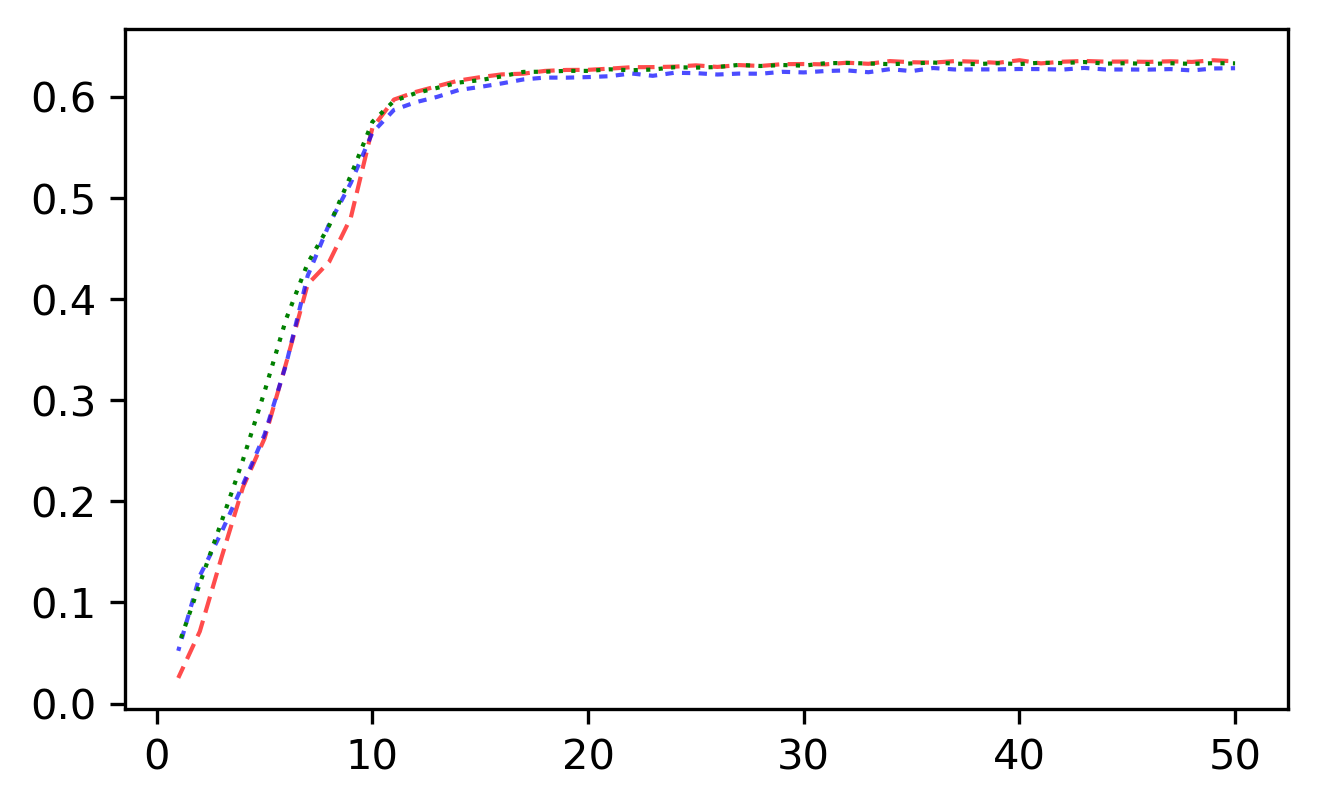

In [31]:
mpl.rcParams['text.usetex'] = False
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize = (5,3))

plot_epochs = 50;

x_array = np.arange(1, plot_epochs+1)

ax.plot(x_array, history.history['cc_0'][0:plot_epochs], color='red',alpha=0.7,linestyle=(1, (4, 2)),label=r'$\tau_{11}$',linewidth=1)
ax.plot(x_array, history.history['cc_1'][0:plot_epochs],color='blue',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{22}$',linewidth=1)
ax.plot(x_array, history.history['cc_2'][0:plot_epochs],color='green',linestyle=(1, (1, 2)),label=r'$\tau_{33}$',linewidth=1)
ax.plot(x_array, history.history['cc_3'][0:plot_epochs],color='lime',alpha=1,linestyle=(1, (4, 2)),label=r'$\tau_{12}$',linewidth=1)
ax.plot(x_array, history.history['cc_4'][0:plot_epochs],color='cyan',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{13}$',linewidth=1)
ax.plot(x_array, history.history['cc_5'][0:plot_epochs],color='fuchsia',linestyle=(1, (1, 2)),label=r'$\tau_{23}$',linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(ticks, plot_epochs)
xticks = np.array([y for y in ticks if y != 0])
xticks = np.insert(ticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
ax.set_xticks(ticks = xticks)
ax.set_yticks(ticks = yticks)

plt.ylabel("Correlation Coeffient")
plt.xlabel("Epoch")

ax.legend(frameon=False,loc='lower right')

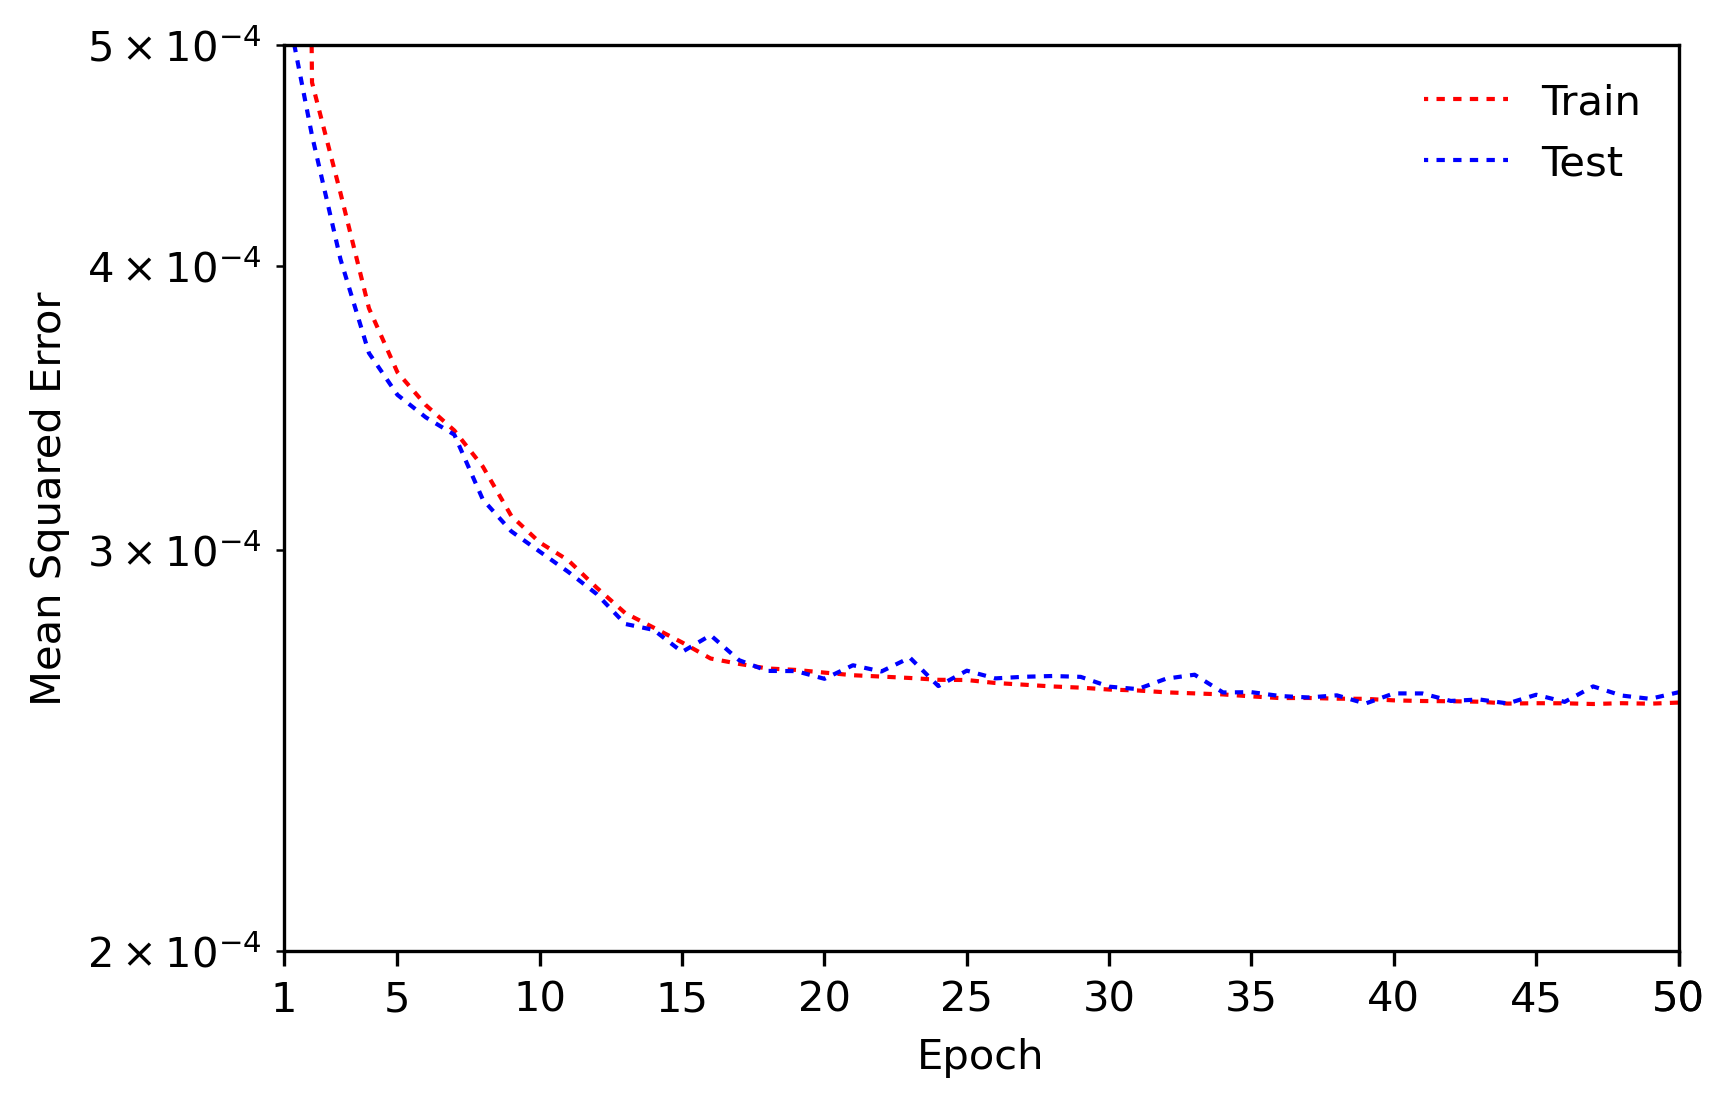

In [108]:
plt.plot(x_array,history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
plt.plot(x_array,history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

plt.ylim([0.0002,0.0005])
plt.yscale("log")
plt.xlim(1, 50)

ticks = np.arange(0, plot_epochs+1, 5)
ticks = np.append(ticks, plot_epochs)
ticks = np.array([y for y in ticks if y != 0])
ticks = np.insert(ticks, 0, 1)
plt.xticks(ticks = ticks)

mpl.rcParams['figure.dpi'] = 300

plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

plt.show()

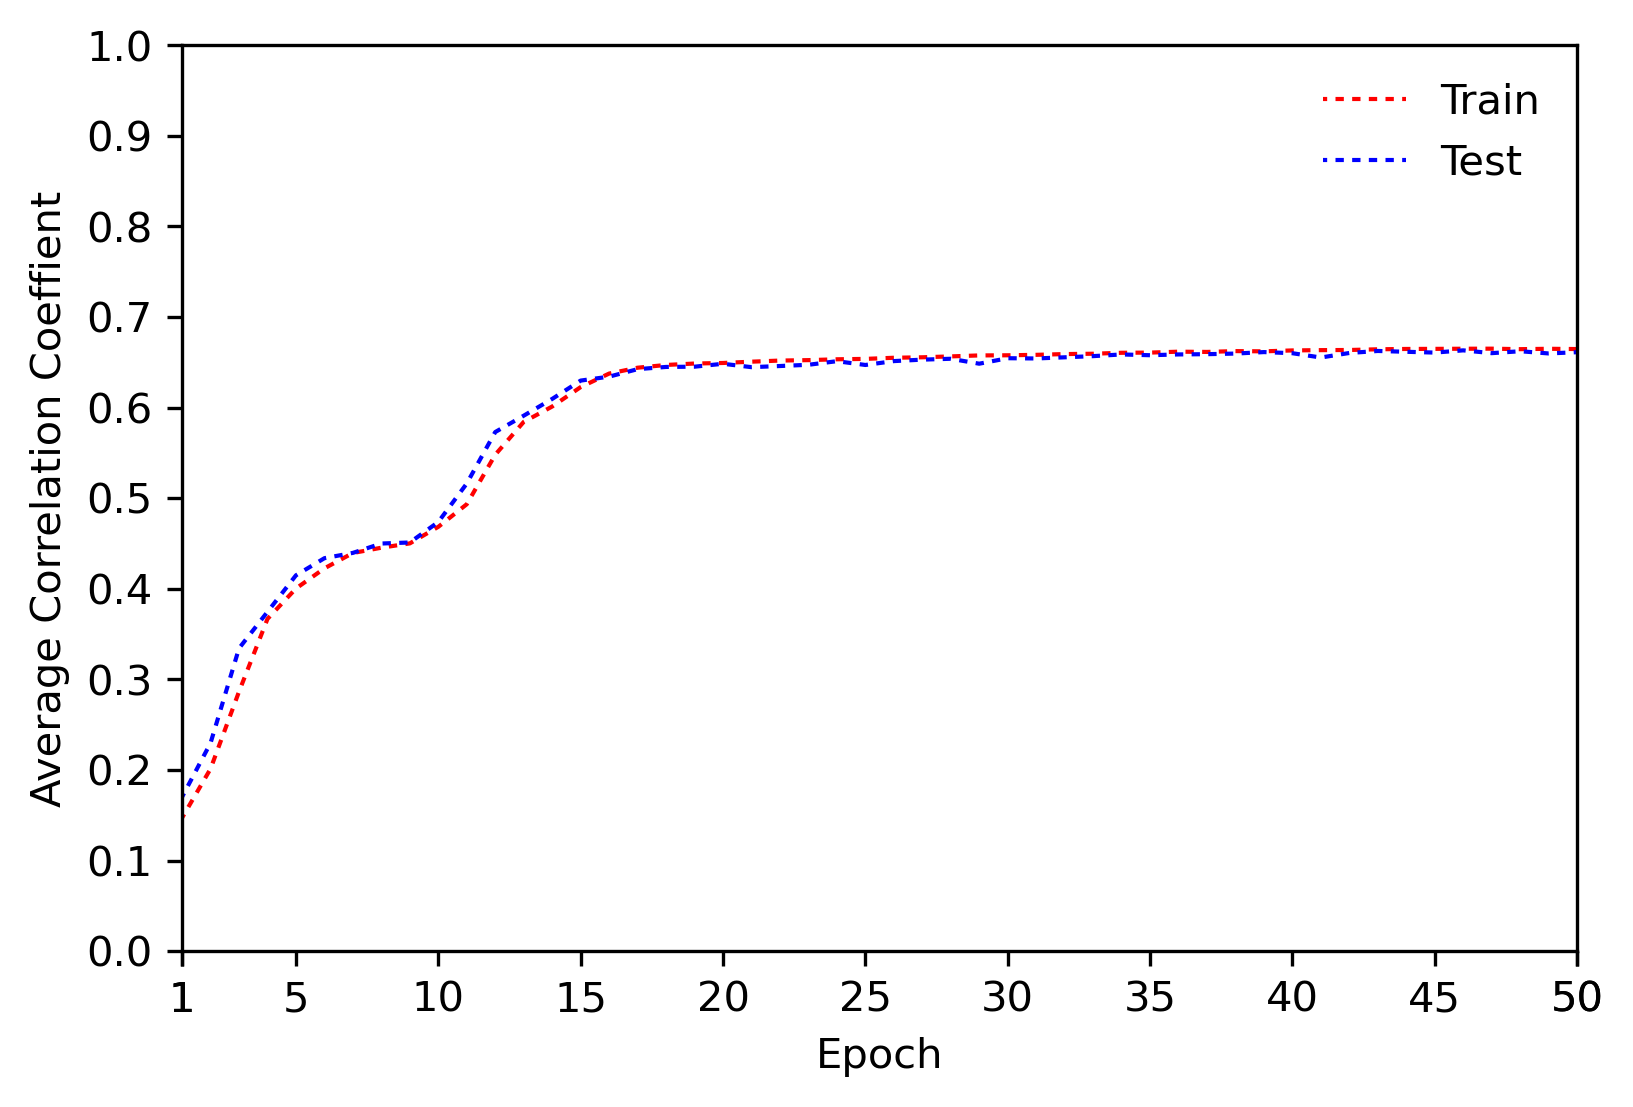

In [116]:
average_cc_train = np.mean([history.history['cc_0'],
                            history.history['cc_1'],
                            history.history['cc_2'],
                            history.history['cc_3'],
                            history.history['cc_4'],
                            history.history['cc_5']],
                           axis = 0)

average_cc_test = np.mean([history.history['val_cc_0'],
                            history.history['val_cc_1'],
                            history.history['val_cc_2'],
                            history.history['val_cc_3'],
                            history.history['val_cc_4'],
                            history.history['val_cc_5']],
                           axis = 0)

plt.plot(x_array,average_cc_train, color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
plt.plot(x_array,average_cc_test, color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(ticks, plot_epochs)
xticks = np.array([y for y in ticks if y != 0])
xticks = np.insert(ticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
plt.xticks(ticks = xticks)
plt.yticks(ticks = yticks)

plt.ylabel("Average Correlation Coeffient")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

In [ ]:
# print(history.history['correlation_coefficient_theo'])

In [ ]:
# model.save("24_05_22_NN01.h5")

In [67]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
    
frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, './', '29_05_21_NN01.pb', as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


'./29_05_21_NN01.pb'

In [ ]:
Xt = np.array([[15.108, 5.39327, -6.04762, 12.0882, -7.9697, -17.251, 6.47427, 3.87336, -10.3209]])
print(np.shape(Xt))
Yt_predict = model.predict(Xt)
print(Yt_predict)

In [87]:
model.outputs[0]

<tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 6) dtype=float32>